<a href="https://colab.research.google.com/github/sarjakpatel/SpamMessage-SpamLinkDetection/blob/main/linkDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link Detector :-

This model is used for detecting Phised domains and as this is a classification problem, we will use a dataset that comprises of collection of samples of phised and legitimate domains.

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import random
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Let us take a quick look at the dataset.

In [ ]:
urls_data = pd.read_csv("/content/urls.csv")
urls_data.head(5)

,url,label
0,freebase.com/view/en/bob_sirois,good
1,en.wikipedia.org/wiki/Joie_Lee,good
2,pipl.com/directory/people/Rejean/Beaudin,good
3,flickr.com/photos/teneyck/sets/72157610336209297/,good
4,ussoccer.com/News/Federation-Services/2009/06/...,good


In [ ]:
urls_data.shape
#This model is trained using 420k records.

(420504, 2)

In [ ]:
#Renaming the columns for convenience
urls_data = urls_data.rename(columns={'url':'URLs','label':'status'})
urls_data.sample(5)

,URLs,status
217586,canadiansleepsociety.com/,good
198138,plasticcz.com/Aol.html,bad
319861,allposters.com/-st/Gilles-Gorriti-Posters_c100...,good
29508,aipsmedia.com/index.php?page=events2&cod=11&sw...,good
79735,en.wikipedia.org/wiki/Ella_Baker,good


#Explorative Data Analysis(EDA)

In [ ]:
urls_data['status'].value_counts()

good    344861
bad      75643
Name: status, dtype: int64

This dataset consists of about 340k good links and 75k malicious links.

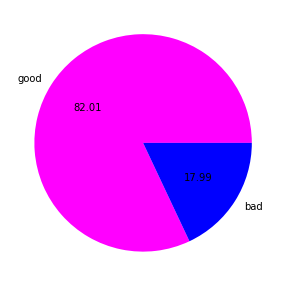

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = [5,5])
mycolor = ['Magenta','blue']
label = ['good','bad']
plt.pie(urls_data['status'].value_counts(),autopct="%0.2f", colors = mycolor,labels = label)
plt.show()

The above figure denotes:

1) 82% are good links

2) 18% are malicious links.

Text(0.5, 1.0, 'Types of Links')

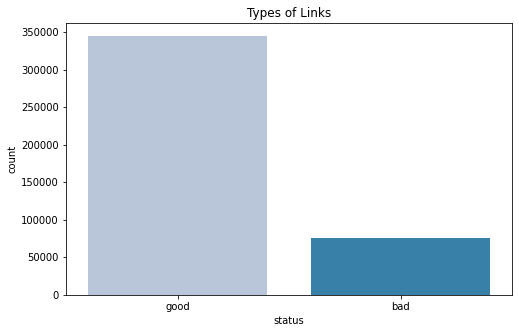

In [ ]:
# Bar Graph
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='status', data=urls_data, palette = 'PuBu')
plt.title('Types of Links')


Now, let us create Word Cloud for both the types of links

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(background_color='white',width=400,height=400,min_font_size=5)

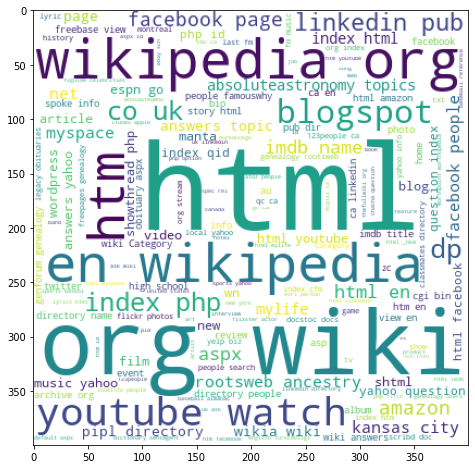

In [ ]:
#Word Cloud for benefeciary links
spam = cloud.generate(urls_data[urls_data['status'] == 'good']['URLs'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(spam)

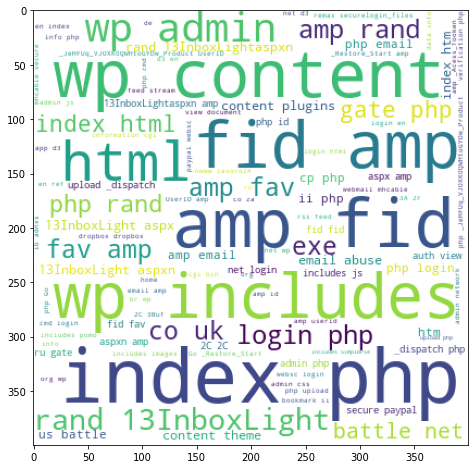

In [ ]:
#Word Cloud for malicious links
ham = cloud.generate(urls_data[urls_data['status'] == 'bad']['URLs'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(ham)

# Transforming the Dataset

Step 1: Tokenizing the links 

Step 2: Transforming it using Count Vectorizer.

In [ ]:
#breaking the URLs into tokens
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))
    if 'com' in total_Tokens:
        total_Tokens.remove('com')
    return total_Tokens

In [ ]:
y = urls_data["status"]

In [ ]:
url_list = urls_data["URLs"]
url_list.head()

0                      freebase.com/view/en/bob_sirois
1                       en.wikipedia.org/wiki/Joie_Lee
2             pipl.com/directory/people/Rejean/Beaudin
3    flickr.com/photos/teneyck/sets/72157610336209297/
4    ussoccer.com/News/Federation-Services/2009/06/...
Name: URLs, dtype: object

In [ ]:
#transforming the column using Count Vectorizer
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(url_list)
#here , the transformation part ends.

#Data Modelling

In [ ]:
#Splitting the dataset into 90% training data and 10% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
#importing the necessary libraries
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [ ]:
#Training the dataset using Logistic Regression
logit = LogisticRegression()	
logit.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print("Accuracy of the model trained using Logistic Regression ",logit.score(X_test, y_test))

Accuracy of the model trained using Logistic Regression  0.9721053007062852


In [ ]:
logit1 = MultinomialNB()	
logit1.fit(X_train, y_train)
print("Accuracy of the model trained using Multinomial Naive Bayes ",logit1.score(X_test, y_test))

Accuracy of the model trained using Multinomial Naive Bayes  0.974245558964115


In [ ]:
logit2 = KNeighborsClassifier()	
logit2.fit(X_train, y_train)
print("Accuracy of the model trained using k Nearest Neighbour  algorithm ",logit2.score(X_test, y_test))

Accuracy of the model trained using k Nearest Neighbour  algorithm  0.9557917766521604


In [ ]:
logit3 = XGBClassifier()	
logit3.fit(X_train, y_train)
print("Accuracy ",logit3.score(X_test, y_test))


Accuracy  0.8953175905448146


Conclusion:- The Accuracy of model trained using Logistic Regression is about 97.21%, which is highest among all.

Now, we will train the model using different algorithms and compare their accuracy.

#Testing

Now, we will test the working of this model in this step.

In [ ]:
X_predict = [
             "facebook.com/login",
"google.com/search=nevilshah", 
"www.radsport-voggel.de/wp-admin/includes/log.exe", 
"ahrenhei.without-transfer.ru/nethost.exe ",
"www.itidea.it/centroesteticosothys/img/_notes/gum.exe","https://m.paytm.me/fsw"]

In [ ]:
X_predict = vectorizer.transform(X_predict)
New_predict = logit.predict(X_predict)

In [ ]:
print(New_predict)

['good' 'good' 'bad' 'bad' 'bad' 'bad']


In [ ]:
pickle.dump(logit,open('linkModel.pkl','wb'))

In [ ]:
pickle.dump(vectorizer,open('vectorizer_url.pkl','wb'))

In [ ]:
clf=pickle.load(open("vectorizer_url.pkl","rb"))


In [ ]:
clf

CountVectorizer()